# Загружаем библиотеки

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Загружаем данные

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


# Просмотр фрагмента данных

In [ ]:
x_train[10]

# посмотрим словарь слов

In [ ]:
word_index = imdb.get_word_index()
word_index

сделаем реверсивный словарь

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
for i in range(1,31):
  print(i, '=', reverse_word_index[i])

# раскодируем рецензию

In [10]:
decoded_review = ' '.join([reverse_word_index[i] for i in x_train[19]])
decoded_review

"the exercise he it is tony falls ask has is found and sophie david order besides and it age cole watch extraordinary would it racist bad them can of order this community dancer of introduced for at does for all with released movies sometimes to for be war rock made all it coming all well fighting in cheap not his movie high and 1969 actors know bad can and chance 6 rave tendency 1974 in homicidal or weren't to and is got say room straightforward legend like that hand some it of looney br about help of you it is over are of straight able of their book an of details have stuff that in not that it her and anyone who so devil's down course sophie to straightforward for have big 3 not also global she this of played sophie there theatre will life are goes in still lion to would to straightforward he parsons who is success save br being before this television god is nobody to tony ask for into and to and have"

# проведем векторизацию текста отзыва в формате one hot encoding

In [11]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [12]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [13]:
x_train[19]

array([0., 1., 1., ..., 0., 0., 0.])

# Строим нейронную сеть

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Компилируем модель

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель

In [16]:
textmodel = model.fit(x_train,
                      y_train,
                      epochs=20,
                      batch_size=120,
                      validation_split=0.1)

Epoch 1/20
188/188 [==============================] - 4s 15ms/step - loss: 0.3696 - accuracy: 0.8547 - val_loss: 0.2749 - val_accuracy: 0.8944
Epoch 2/20
188/188 [==============================] - 2s 13ms/step - loss: 0.2098 - accuracy: 0.9214 - val_loss: 0.2814 - val_accuracy: 0.8912
Epoch 3/20
188/188 [==============================] - 2s 13ms/step - loss: 0.1654 - accuracy: 0.9383 - val_loss: 0.3355 - val_accuracy: 0.8828
Epoch 4/20
188/188 [==============================] - 2s 13ms/step - loss: 0.1390 - accuracy: 0.9488 - val_loss: 0.3872 - val_accuracy: 0.8772
Epoch 5/20
188/188 [==============================] - 2s 13ms/step - loss: 0.1180 - accuracy: 0.9577 - val_loss: 0.3691 - val_accuracy: 0.8868
Epoch 6/20
188/188 [==============================] - 2s 13ms/step - loss: 0.0984 - accuracy: 0.9663 - val_loss: 0.3955 - val_accuracy: 0.8788
Epoch 7/20
188/188 [==============================] - 2s 12ms/step - loss: 0.0830 - accuracy: 0.9709 - val_loss: 0.4506 - val_accuracy: 0.8784

# Визуализируем процесс обучения

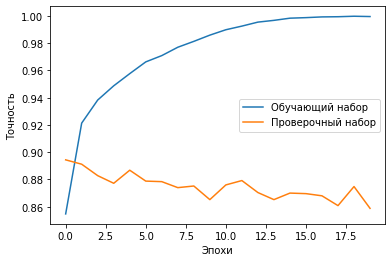

In [17]:
plt.plot(textmodel.history['accuracy'],
         label='Обучающий набор')
plt.plot(textmodel.history['val_accuracy'],
         label='Проверочный набор')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Проверка нейросети на тестовых данных

In [18]:
finalscore = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.6676 - accuracy: 0.8392
